In [152]:
import pandas as pd
groups_no_prod = pd.read_csv("groups_no_prod.csv")
group_id_0 = groups_no_prod

In [153]:
groups_no_prod.group_id[0]


82015

In [154]:
from os import listdir

file_list = listdir("consumption_power")
file_list

01028.csv',
 '81144_hv_20160401_20201028.csv',
 '81146_hv_20160401_20201028.csv',
 '81147_hv_20160401_20201028.csv',
 '81148_hv_20160401_20201028.csv',
 '81149_hv_20160401_20201028.csv',
 '81150_hv_20160401_20201028.csv',
 '81151_hv_20160401_20201028.csv',
 '81152_hv_20160401_20201028.csv',
 '81153_hv_20160401_20201028.csv',
 '81155_hv_20160401_20201028.csv',
 '81156_hv_20160401_20201028.csv',
 '81157_hv_20160401_20201028.csv',
 '81159_hv_20160401_20201028.csv',
 '81163_hv_20160401_20201028.csv',
 '81164_hv_20160401_20201028.csv',
 '81166_hv_20160401_20201028.csv',
 '81167_hv_20160401_20201028.csv',
 '81168_hv_20160401_20201028.csv',
 '81170_hv_20160401_20201028.csv',
 '81171_hv_20160401_20201028.csv',
 '81173_hv_20160401_20201028.csv',
 '81176_hv_20160401_20201028.csv',
 '81177_hv_20160401_20201028.csv',
 '81180_hv_20160401_20201028.csv',
 '81181_hv_20160401_20201028.csv',
 '81182_hv_20160401_20201028.csv',
 '81183_hv_20160401_20201028.csv',
 '81185_hv_20160401_20201028.csv',
 '81186_

In [155]:
file_list = listdir("consumption_power")
group_no_id_list = [f[:5] for f in file_list]

In [156]:
group_no_id_list.count('91100')

1

In [157]:
from os import listdir

def read_comsumption_file(group_id):
    file_list = listdir("consumption_power")
    group_no_id_list = [f[:5] for f in file_list]
    consumption_power_name = file_list[group_no_id_list.index(group_id)] 
    return pd.read_csv("consumption_power/"+consumption_power_name)

def read_meteo_data_file(group_id):
    file_list = listdir("meteo_data")
    group_no_id_list = [f[-9:-4] for f in file_list]
    meteo_data_name = file_list[group_no_id_list.index(group_id)] 
    return pd.read_csv("meteo_data/"+meteo_data_name)

# read_comsumption_file("92046")


In [158]:
group_id_no = str(groups_no_prod.group_id[10])
consumption_df = read_comsumption_file(group_id_no) 
meteo_df = read_meteo_data_file(group_id_no)

In [159]:
print(consumption_df.columns)
print(meteo_df.columns)
meteo_df.head()

Index(['filter_mva', 'filter_mw', 'filtered_manual_int', 'gen', 'net_mw',
       'time_zone_offset', 'timestamp', 'underlying_mw'],
      dtype='object')
Index(['prate', 'tcdcclm', 'timestamp', 'tmp2m', 'wnd10m_u', 'wnd10m_v',
       'group_id'],
      dtype='object')


,prate,tcdcclm,timestamp,tmp2m,wnd10m_u,wnd10m_v,group_id
0,0.000131,99.0,2019-09-03 09:00:00,287.107000,2.28,3.32,82039
1,0.000003,95.0,2016-06-04 02:00:00,285.970016,-1.75,-1.44,82039
2,0.000028,100.0,2019-09-05 19:00:00,285.230000,5.22,2.70,82039
3,0.000000,20.0,2017-02-04 20:00:00,274.944016,-0.32,3.45,82039
4,0.000140,99.0,2019-09-03 08:00:00,287.057000,2.14,3.00,82039


In [160]:
from datetime import datetime

def read_date(datetime_str):
    return datetime.strptime(datetime_str, '%Y-%m-%d %H:%M:%S')

meteo_df["datetime"] = [read_date(date) for date in meteo_df.timestamp]
consumption_df["datetime"] = [read_date(date) for date in consumption_df.timestamp]
# meteo_df["date"] = [datetime.date for date in meteo_df.datetime]
# consumption_df["date"] = [datetime.date for date in consumption_df.datetime]

def change_scale(df,n,param):
    df[param] = meteo_df[param].rolling(n).sum()
    df[n::n][param].plot()



In [161]:
meteo_df

,prate,tcdcclm,timestamp,tmp2m,wnd10m_u,wnd10m_v,group_id,datetime
0,0.000131,99.0,2019-09-03 09:00:00,287.107000,2.28,3.32,82039,2019-09-03 09:00:00
1,0.000003,95.0,2016-06-04 02:00:00,285.970016,-1.75,-1.44,82039,2016-06-04 02:00:00
2,0.000028,100.0,2019-09-05 19:00:00,285.230000,5.22,2.70,82039,2019-09-05 19:00:00
3,0.000000,20.0,2017-02-04 20:00:00,274.944016,-0.32,3.45,82039,2017-02-04 20:00:00
4,0.000140,99.0,2019-09-03 08:00:00,287.057000,2.14,3.00,82039,2019-09-03 08:00:00
...,...,...,...,...,...,...,...,...
39451,0.000003,79.0,2018-04-22 18:00:00,282.125000,4.02,5.19,82039,2018-04-22 18:00:00
39452,0.000015,92.0,2018-08-24 14:00:00,286.546000,5.63,-0.75,82039,2018-08-24 14:00:00
39453,0.000010,84.0,2018-04-20 04:00:00,281.474016,1.05,2.03,82039,2018-04-20 04:00:00
39454,0.000000,93.0,2018-08-23 00:00:00,283.618000,1.30,2.76,82039,2018-08-23 00:00:00


<AxesSubplot:>

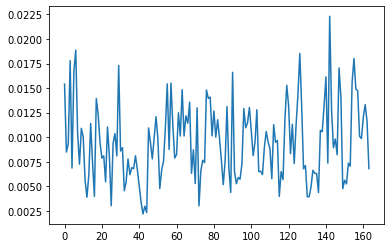

In [228]:
def change_scale(df,n,param):
    """plot the parameter data sum on a given time 
    ex : n=48 gives the sum for each day"""
    df[param+"_sum"] = meteo_df[param].rolling(n).sum()
    return df[n::n][param+"_sum"].reset_index()[param+"_sum"]

# scaled_df = change_scale(meteo_df,48*30,"wnd10m_u")
scaled_df = change_scale(meteo_df,48*5,"prate")

scaled_df[:].plot()

# meteo_df.tmp2m[:365].plot()

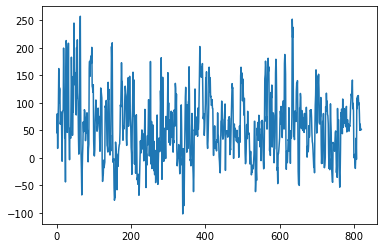

In [ ]:
change_scale(meteo_df,48,"tmp2m")

In [184]:
a=meteo_df[48::48]

<AxesSubplot:>

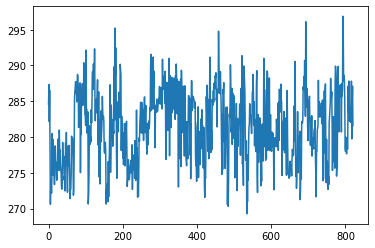

In [193]:
a["tmp2m"].reset_index()["tmp2m"].plot()

<AxesSubplot:>

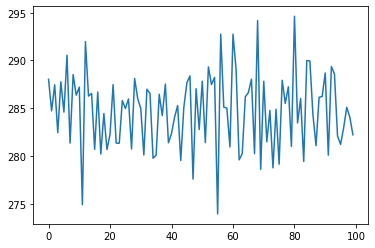

In [66]:
meteo_df[:100].tmp2m.plot()   

<AxesSubplot:>

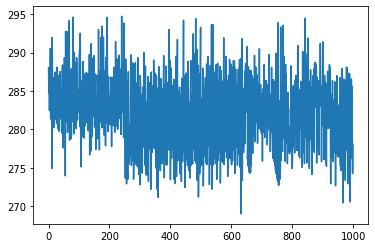

In [67]:
meteo_df[:1000].tmp2m.plot()   

<AxesSubplot:>

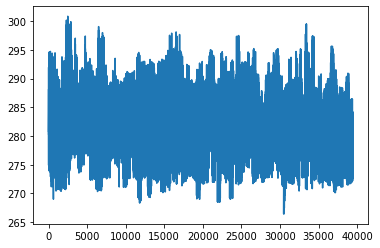

In [68]:
meteo_df[:].tmp2m.plot()   

<AxesSubplot:>

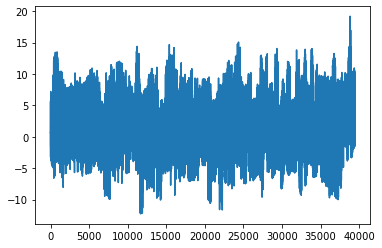

In [60]:
meteo_df.wnd10m_u.plot()

<AxesSubplot:>

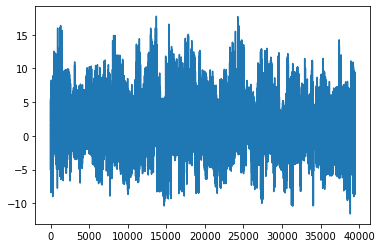

In [61]:
meteo_df.wnd10m_v.plot()